<h1 align="left">Project One - MSFT</h1>
<!-- TABLE OF CONTENTS -->
<details>
  <summary>Table of Contents</summary>
  <ol>
    <li><a href="#import-modules">Import Modules</a></li>
    <li><a href="#data-preparation">Data Preparation</a></li>
    <!-- <li><a href="#classifiers">Classifiers</a></li> -->
    <li>
      <a href="#strategies">Strategies</a>
      <ul>
        <li><a href="#hypertuning">Hypertuning</a></li>
        <li><a href="#k-nearest-neighbors">K-Nearest Neighbors</a></li>
        <li><a href="#random-forest">Random Forest</a></li>
        <li><a href="#gradient-boosting">Gradient Boosting</a></li>
        <li><a href="#support-vector-machines">Support Vector Machines</a></li>
      </ul>
    </li>
  </ol>
</details>

## Import Modules
Required imports to perform all operations successfully.

In [362]:
import warnings
import pandas as pd
import numpy as np 
import yfinance as yf 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from skopt import BayesSearchCV 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb
from sklearn.svm import SVC as svm
from xgboost import XGBClassifier as xgb

## Data Preparation
Pre-process and clean the data.
- Check for the following:
    - missing values
    - duplicate rows
    - abnormal data types (not float or int)
    - etc.

Display historical data and calculated moving averages. 
- 50-Day moving average
- 200-Day moving average


In [363]:
def download_stock_data(symbol: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Download closing price data for MSFT within the specified date range.
    """
    try:
        warnings.simplefilter(action="ignore", category=FutureWarning)
        df = yf.download(symbol, start=start_date, end=end_date)
        return df
    except Exception as e:
        print(f'Error occurred when downloading: {e}')
        return None

def check_data(df: pd.DataFrame) -> None:
    """
    Identifies outliers within the data needed to be cleaned or addressed. 
    """
    if df is not None:
        print('Checking for missing values...')
        if df.isnull().sum().sum() == 0:
            print('No missing values found.', '\n')
        else:
            print(df.isnull().sum(), '\n')

        print('Checking for duplicate rows...')
        if df.duplicated().sum() == 0:
            print('No duplicate rows found.', '\n')
        else:
            print(df.duplicated().sum(), '\n')

        print('Checking data types...')
        if all(dtypes == float or dtypes == int for dtypes in df.dtypes):
            print('No abnormal data types found.', '\n')
        else:
            print(df.dtypes, '\n')

        print('Generating summary statistics...')
        display(df.describe())
    else:
        raise Exception('Error: No data available')
    
def calculate_moving_averages(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the 50-day and 200-day moving averages for the given DataFrame.
    **Note: min_periods will eliminate nan values; however, tradeoffs do exist.
    """
    if df is not None:
        ma_50 = df['Adj Close'].rolling(window=50, min_periods=1).mean()
        ma_200 = df['Adj Close'].rolling(window=200, min_periods=1).mean()
        df['50-Day Moving Avg'] = ma_50
        df['200-Day Moving Avg'] = ma_200
        return df
    else:
        raise Exception('Error: No data available')

def plot_data(df: pd.DataFrame, adj: pd.Series, ma_50: pd.Series, ma_200: pd.Series, title: str) -> None:
    """
    Plot historical prices and rolling stats.
    """
    if df is not None:
        print('Plotting MSFT data...')
        mpl.rc('xtick', labelsize=8)
        mpl.rc('ytick', labelsize=8)
        plt.figure(figsize=(10, 6))
        # plt.plot(df.index, open, label='Open')
        # plt.plot(df.index, high, label='High')
        # plt.plot(df.index, low, label='Low')
        # plt.plot(df.index, close, label='Close')
        plt.plot(df.index, adj, label='Adj Close')
        plt.plot(df.index, ma_50, label='50-Day Moving Avg')
        plt.plot(df.index, ma_200, label='200-Day Moving Avg')
        plt.title(title)
        plt.legend()
        plt.show()
    else:
        raise Exception('Error: No data available')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,50-Day Moving Avg,200-Day Moving Avg
Date,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.378075,40.378075,40.378075
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.006771,40.192423,40.192423
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.419559,39.934802,39.934802
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.920399,39.931201,39.931201
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.094788,40.163918,40.163918
...,...,...,...,...,...,...,...
2023-08-24,332.850006,332.980011,319.959991,319.970001,318.732483,332.380886,283.561078
2023-08-25,321.470001,325.359985,318.799988,322.980011,321.730835,332.108997,284.045648
2023-08-28,325.660004,326.149994,321.720001,323.700012,322.448059,331.637537,284.528872


Checking for missing values...
No missing values found. 

Checking for duplicate rows...
No duplicate rows found. 

Checking data types...
No abnormal data types found. 

Generating summary statistics...


,Open,High,Low,Close,Adj Close,50-Day Moving Avg,200-Day Moving Avg
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,154.567982,156.142161,152.948702,154.618147,149.176314,145.936609,136.950922
std,94.979997,96.022875,93.899875,94.996835,95.426944,93.868354,89.984431
min,40.340000,40.740002,39.720001,40.290001,34.886105,36.736485,37.452048
25%,64.547503,64.942497,64.235001,64.635000,59.249489,58.057707,52.831990
50%,124.600002,125.820000,123.825001,125.470001,119.433922,112.872825,104.429131
75%,243.172497,245.300003,240.820000,243.007500,238.935291,237.692926,225.788628
max,361.750000,366.779999,352.440002,359.489990,357.343048,334.563110,299.007991


Plotting MSFT data...


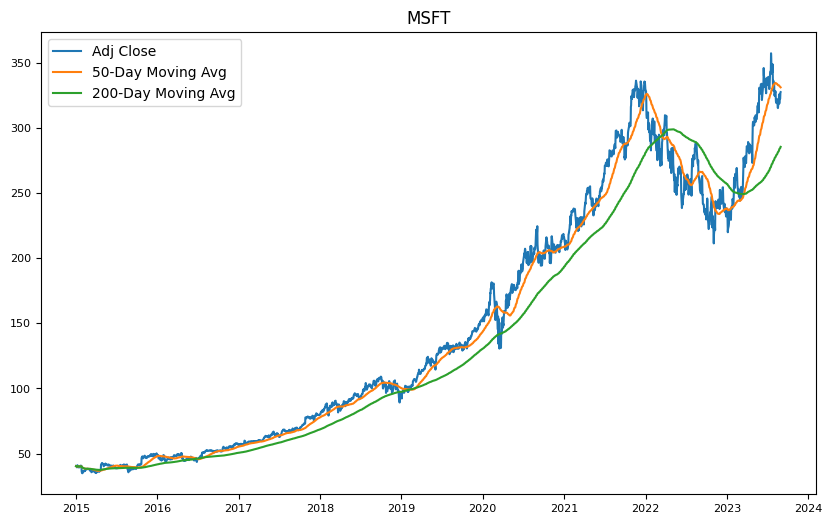

In [364]:
symbol = 'MSFT'
start_date = '2015-01-01'
end_date = '2023-08-31'
df_MSFT = download_stock_data(symbol, start_date, end_date).drop(columns={'Volume'})
df_MSFT = calculate_moving_averages(df_MSFT)
display(df_MSFT)
check_data(df_MSFT)
plot_data(df_MSFT, df_MSFT['Adj Close'], df_MSFT['50-Day Moving Avg'], df_MSFT['200-Day Moving Avg'],'MSFT')

## Strategies
Define the Feature Variable ‘X’, and the Label/Target variable ‘y’.

Spilt the data into training and test datasets (use the 80/20 percent ratio).
- Strategy One 
    - If the next trading day's close price is greater than today's close price then the signal is ‘buy’, otherwise ‘sell’
- Strategy Two 
    - Utilize the 50-day moving average vs the 200-day moving average. Generate 'buy' and 'sell' signals using 'golden/death cross' patterns

In [365]:
def define_variables(df: pd.DataFrame, signal: pd.Series) -> tuple[np.ndarray, np.ndarray]:
    """
    Define feature variable 'X' and label/target variable 'y'
    **Note: 'Adj Close' and MAs are not included within the feature variable to avoid data leakage and redundancy 
    """
    if df is not None:
        X = df[['Open', 'High', 'Low', 'Close']].values
        y = signal.values
        return X, y
    else:
        raise Exception('Error: No data available')

In [366]:
df_MSFT['Signal One'] = np.where(df_MSFT['Adj Close'].shift(-1) > df_MSFT['Adj Close'], 1, -1)
display(df_MSFT)
X_one, y_one = define_variables(df_MSFT, df_MSFT['Signal One'])
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one, y_one, test_size=0.2, random_state=42)
variables_one = [X_train_one, X_test_one, y_train_one, y_test_one]
for var in variables_one:
    display(var.shape)
    # display(var)

,Open,High,Low,Close,Adj Close,50-Day Moving Avg,200-Day Moving Avg,Signal One
Date,,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.378075,40.378075,40.378075,-1
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.006771,40.192423,40.192423,-1
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.419559,39.934802,39.934802,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.920399,39.931201,39.931201,1
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.094788,40.163918,40.163918,-1
...,...,...,...,...,...,...,...,...
2023-08-24,332.850006,332.980011,319.959991,319.970001,318.732483,332.380886,283.561078,1
2023-08-25,321.470001,325.359985,318.799988,322.980011,321.730835,332.108997,284.045648,1
2023-08-28,325.660004,326.149994,321.720001,323.700012,322.448059,331.637537,284.528872,1


(1744, 4)

(436, 4)

(1744,)

(436,)

In [367]:
df_MSFT['Signal Two'] = np.where(df_MSFT['50-Day Moving Avg'] > df_MSFT['200-Day Moving Avg'], 1, -1)
display(df_MSFT)
X_two, y_two = define_variables(df_MSFT, df_MSFT['Signal Two'])
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size=0.2, random_state=42)
variables_two = [X_train_two, X_test_two, y_train_two, y_test_two]
for var in variables_two:
    display(var.shape)
    # display(var)

,Open,High,Low,Close,Adj Close,50-Day Moving Avg,200-Day Moving Avg,Signal One,Signal Two
Date,,,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.378075,40.378075,40.378075,-1,-1
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.006771,40.192423,40.192423,-1,-1
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.419559,39.934802,39.934802,1,-1
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.920399,39.931201,39.931201,1,-1
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.094788,40.163918,40.163918,-1,-1
...,...,...,...,...,...,...,...,...,...
2023-08-24,332.850006,332.980011,319.959991,319.970001,318.732483,332.380886,283.561078,1,1
2023-08-25,321.470001,325.359985,318.799988,322.980011,321.730835,332.108997,284.045648,1,1
2023-08-28,325.660004,326.149994,321.720001,323.700012,322.448059,331.637537,284.528872,1,1


(1744, 4)

(436, 4)

(1744,)

(436,)

## Hypertuning
Various methods exist for hypertuning parameters.
- Grid Search
    - Exhaustive approach that explores all possible combinations of hyperparameters
    - Simple but expensive computationally
    - Low scalability, adding parameters will increase runtime exponentially
- Random Search
    - Samples random combinations, not all, of hyperparameters
    - Better scalability, less intensive
    - No guarantee of receiving the optimal combination of hyperparameters
- Bayesian Optimization (Bayes Search)
    - Efficient and robust approach that uses a probability model of the objective function to perform search 
    - Official scikit-optimization documentation states: 
        - "A predictive model referred to as 'surrogate' is used to model the search space and utilized to arrive at good parameter values combination as soon as possible."
        - Uses past evaluations to reach an outcome faster more efficiently

In [368]:
def hypertune_Model(clf, params: dict, X_train: np.ndarray, y_train: np.ndarray) -> None:
    """
    Hyperparameter tuning classifiers using Bayesian optimization.
    """
    if X_train is not None and y_train is not None:
        warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before.")
        opt = BayesSearchCV(
            clf,
            params,
            cv=5,
            n_iter=50,
            scoring='accuracy',
            random_state=42
        )
        opt.fit(X_train, y_train)
        print(f"Best Param: {opt.best_params_}")
        print(f"Best Score: {opt.best_score_}")
    else:
        raise Exception('Error: No data available')

## K-Nearest Neighbors
"Implements learning based on the 'k' nearest neighbors of each query point, where 'k' is an integer value specified by the user."
- Parameters being tuned:
    - 'n_neighbors'
    - 'weights' 
    - 'leaf_size'
    - 'p'
    - 'metric'


In [369]:
def apply_KNN(knn_clf: knn, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Apply k-Nearest Neighbors (KNN) classifier, generate predictions, and evaluate the model.
    """
    if isinstance(knn_clf, knn):
        fitted_knn = knn_clf.fit(X_train, y_train)
        display(fitted_knn)
        predictions_knn = fitted_knn.predict(X_test)
        cm = confusion_matrix(y_test, predictions_knn)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
        disp.plot()
        plt.show()
        print(classification_report(y_test, predictions_knn))
    else:
        raise ValueError('knn_clf must be an instance of KNeighborsClassifier')

In [370]:
knn_clf = knn()
knn_params = {
    'n_neighbors': (1, 30), 
    'weights': ['uniform', 'distance'], 
    'leaf_size': (1, 30),
    'p': [1, 2], 
    'metric': ['minkowski', 'manhattan']
}
print('Strategy One:')
hypertune_Model(knn_clf, knn_params, X_train_one, y_train_one)
print('\nStrategy Two:')
hypertune_Model(knn_clf, knn_params, X_train_two, y_train_two)

Strategy One:
Best Param: OrderedDict([('leaf_size', 11), ('metric', 'minkowski'), ('n_neighbors', 30), ('p', 1), ('weights', 'uniform')])
Best Score: 0.5355531403352766

Strategy Two:
Best Param: OrderedDict([('leaf_size', 2), ('metric', 'minkowski'), ('n_neighbors', 30), ('p', 2), ('weights', 'distance')])
Best Score: 0.8761535421401048


KNeighborsClassifier(leaf_size=11, n_neighbors=30, p=1)

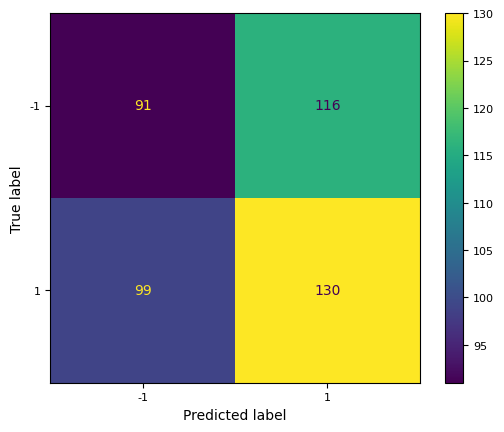

              precision    recall  f1-score   support

          -1       0.48      0.44      0.46       207
           1       0.53      0.57      0.55       229

    accuracy                           0.51       436
   macro avg       0.50      0.50      0.50       436
weighted avg       0.50      0.51      0.51       436



In [371]:
# Before tuning:
# 
#               precision    recall  f1-score   support
# 
#           -1       0.44      0.43      0.43       207
#            1       0.49      0.50      0.50       229
# 
#     accuracy                           0.47       436
#    macro avg       0.46      0.46      0.46       436
# weighted avg       0.46      0.47      0.47       436
# 
# Tuned parameters yield about 8.5% increase in accuracy
knn_clf = knn(n_neighbors=30, weights='uniform', leaf_size=11, p=1, metric='minkowski')
apply_KNN(knn_clf, X_train_one, y_train_one, X_test_one, y_test_one)

KNeighborsClassifier(leaf_size=2, n_neighbors=30, weights='distance')

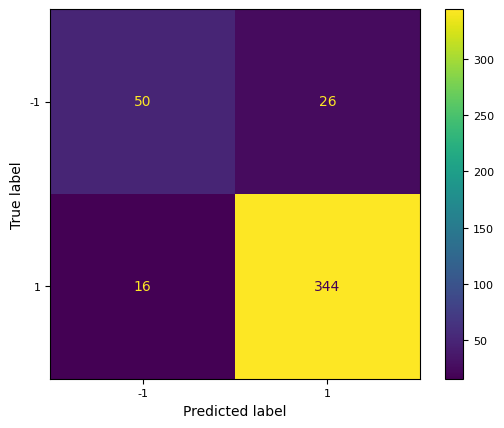

              precision    recall  f1-score   support

          -1       0.76      0.66      0.70        76
           1       0.93      0.96      0.94       360

    accuracy                           0.90       436
   macro avg       0.84      0.81      0.82       436
weighted avg       0.90      0.90      0.90       436



In [372]:
# Before tuning:
#               precision    recall  f1-score   support
# 
#           -1       0.69      0.62      0.65        76
#            1       0.92      0.94      0.93       360
# 
#     accuracy                           0.89       436
#    macro avg       0.81      0.78      0.79       436
# weighted avg       0.88      0.89      0.88       436
# 
# Tuned parameters yield about 1.1% increase in accuracy
knn_clf = knn(n_neighbors=30, weights='distance', leaf_size=2, p=2, metric='minkowski')
apply_KNN(knn_clf, X_train_two, y_train_two, X_test_two, y_test_two)

## Random Forest 
"Fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."
- Parameters being tuned:
    - 'n_estimators' 
    - 'criterion' 
    - 'max_depth' 
    - 'min_samples_split' 
    - 'min_samples_leaf'
    - 'max_features' 
    - 'max_leaf_nodes' 

In [373]:
def apply_RF(rf_clf: rf, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Apply Random Forest (RF) classifier, generate predictions, and evaluate the model.
    """
    if isinstance(rf_clf, rf):
        fitted_rf = rf_clf.fit(X_train, y_train)
        display(fitted_rf)
        predictions_rf = fitted_rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions_rf)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
        disp.plot()
        plt.show()
        print(classification_report(y_test, predictions_rf))
    else:
        raise ValueError('rf_clf must be an instance of RandomForestClassifier')

In [374]:
rf_clf = rf(random_state=42)
rf_params = {
    'n_estimators': list(range(5, 301, 5)),
    'criterion': ['gini', 'entropy'], 
    'max_depth': (1, 20), 
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': ['sqrt', "log2", None],
    'max_leaf_nodes': (2, 20)
}
print('Strategy One:')
hypertune_Model(rf_clf, rf_params, X_train_one, y_train_one)
print('\nStrategy Two:')
hypertune_Model(rf_clf, rf_params, X_train_two, y_train_two)

Strategy One:
Best Param: OrderedDict([('criterion', 'entropy'), ('max_depth', 13), ('max_features', 'sqrt'), ('max_leaf_nodes', 20), ('min_samples_leaf', 1), ('min_samples_split', 15), ('n_estimators', 35)])
Best Score: 0.5470177518690511

Strategy Two:
Best Param: OrderedDict([('criterion', 'entropy'), ('max_depth', 12), ('max_features', None), ('max_leaf_nodes', 19), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 210)])
Best Score: 0.8772881467575668


RandomForestClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=20,
                       min_samples_split=15, n_estimators=35, random_state=42)

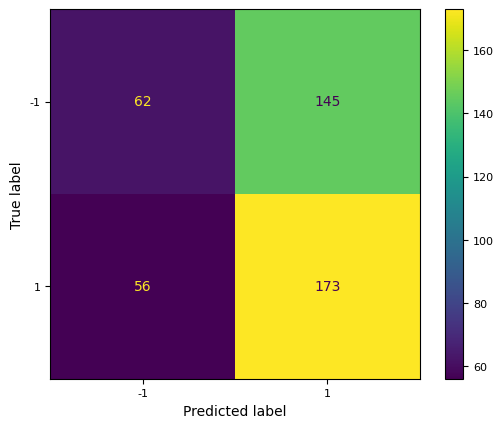

              precision    recall  f1-score   support

          -1       0.53      0.30      0.38       207
           1       0.54      0.76      0.63       229

    accuracy                           0.54       436
   macro avg       0.53      0.53      0.51       436
weighted avg       0.54      0.54      0.51       436



In [375]:
# Before tuning:
#               precision    recall  f1-score   support
# 
#           -1       0.47      0.49      0.48       207
#            1       0.52      0.49      0.50       229
# 
#     accuracy                           0.49       436
#    macro avg       0.49      0.49      0.49       436
# weighted avg       0.49      0.49      0.49       436
# 
# Tuned parameters yield about 10.2% increase in accuracy
rf_clf = rf(n_estimators=35, criterion='entropy', max_depth=13, min_samples_split=15, min_samples_leaf=1, max_features='sqrt', max_leaf_nodes=20, random_state=42)
apply_RF(rf_clf, X_train_one, y_train_one, X_test_one, y_test_one)

RandomForestClassifier(random_state=42)

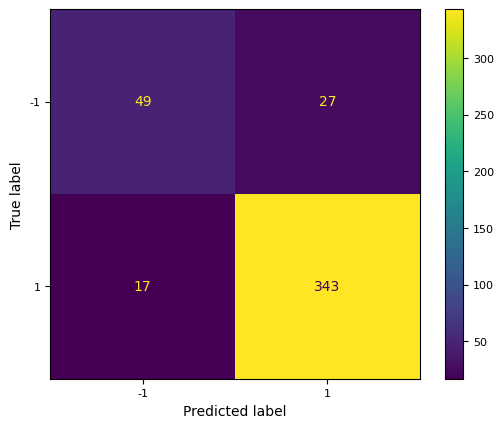

              precision    recall  f1-score   support

          -1       0.74      0.64      0.69        76
           1       0.93      0.95      0.94       360

    accuracy                           0.90       436
   macro avg       0.83      0.80      0.81       436
weighted avg       0.89      0.90      0.90       436



In [376]:
# Before tuning
#               precision    recall  f1-score   support
# 
#           -1       0.74      0.64      0.69        76
#            1       0.93      0.95      0.94       360
# 
#     accuracy                           0.90       436
#    macro avg       0.83      0.80      0.81       436
# weighted avg       0.89      0.90      0.90       436
# 
# Tuned parameters yield no increase in accuracy, use default params
rf_clf = rf(random_state=42)
apply_RF(rf_clf, X_train_two, y_train_two, X_test_two, y_test_two)

## Gradient Boosting
"Builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions."
- Parameters being tuned:
    - 'loss'
    - 'learning_rate'
    - 'n_estimators'
    - 'subsample'
    - 'criterion'
    - 'min_samples_split'
    - 'min_samples_leaf'
    - 'max_depth' 
    - 'max_features'
    - 'max_leaf_nodes'                        

In [377]:
def apply_GB(gb_clf: gb, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Apply Gradient Boosting (GB) classifier, generate predictions, and evaluate the model.
    """
    if isinstance(gb_clf, gb):
        fitted_gb = gb_clf.fit(X_train, y_train)
        display(fitted_gb)
        predictions_gb = fitted_gb.predict(X_test)
        cm = confusion_matrix(y_test, predictions_gb)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
        disp.plot()
        plt.show()
        print(classification_report(y_test, predictions_gb))
    else:
        raise ValueError('gb_clf must be an instance of GradientBoostingClassifier')

In [378]:
gb_clf = gb(random_state=42)
gb_params = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': (0.1, 1.0),
    'n_estimators': list(range(5, 301, 5)),
    'subsample': (0.1, 1.0),
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_depth': (1, 20),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': (2, 20)
}
print('Strategy One:')
hypertune_Model(gb_clf, gb_params, X_train_one, y_train_one)
print('\nStrategy Two:')
hypertune_Model(gb_clf, gb_params, X_train_two, y_train_two)

Strategy One:
Best Param: OrderedDict([('criterion', 'friedman_mse'), ('learning_rate', 0.11143633563866855), ('loss', 'exponential'), ('max_depth', 2), ('max_features', 'log2'), ('max_leaf_nodes', 17), ('min_samples_leaf', 17), ('min_samples_split', 5), ('n_estimators', 180), ('subsample', 0.9770903069649078)])
Best Score: 0.553896189441096

Strategy Two:
Best Param: OrderedDict([('criterion', 'friedman_mse'), ('learning_rate', 0.803844550080611), ('loss', 'exponential'), ('max_depth', 17), ('max_features', 'log2'), ('max_leaf_nodes', 2), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 300), ('subsample', 1.0)])
Best Score: 0.876145308434608


GradientBoostingClassifier(learning_rate=0.11143633563866855,
                           loss='exponential', max_depth=2, max_features='log2',
                           max_leaf_nodes=17, min_samples_leaf=17,
                           min_samples_split=5, n_estimators=180,
                           random_state=42, subsample=0.9770903069649078)

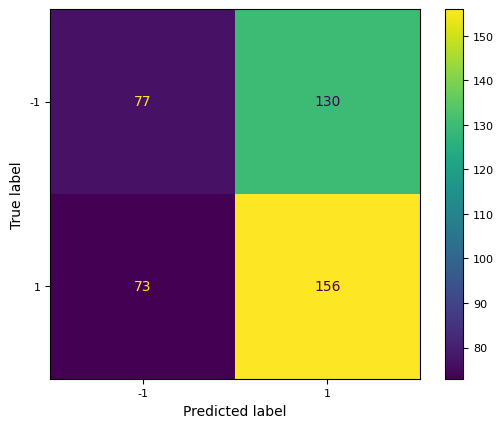

              precision    recall  f1-score   support

          -1       0.51      0.37      0.43       207
           1       0.55      0.68      0.61       229

    accuracy                           0.53       436
   macro avg       0.53      0.53      0.52       436
weighted avg       0.53      0.53      0.52       436



In [379]:
# Before tuning
#               precision    recall  f1-score   support
# 
#           -1       0.47      0.29      0.36       207
#            1       0.52      0.70      0.60       229
# 
#     accuracy                           0.51       436
#    macro avg       0.50      0.50      0.48       436
# weighted avg       0.50      0.51      0.49       436
# 
# Tuned parameters yield about 3.9% increase in accuracy
gb_clf = gb(loss='exponential', learning_rate=0.11143633563866855, n_estimators=180, subsample=0.9770903069649078, criterion='friedman_mse', min_samples_split=5, min_samples_leaf=17, max_depth=2, max_features='log2', max_leaf_nodes=17, random_state=42)
apply_GB(gb_clf, X_train_one, y_train_one, X_test_one, y_test_one)

GradientBoostingClassifier(learning_rate=0.803844550080611, loss='exponential',
                           max_depth=17, max_features='log2', max_leaf_nodes=2,
                           min_samples_split=20, n_estimators=300,
                           random_state=42)

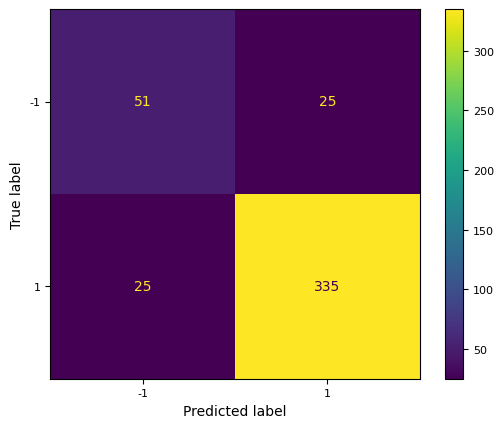

              precision    recall  f1-score   support

          -1       0.67      0.67      0.67        76
           1       0.93      0.93      0.93       360

    accuracy                           0.89       436
   macro avg       0.80      0.80      0.80       436
weighted avg       0.89      0.89      0.89       436



In [380]:
# Before tuning:
#               precision    recall  f1-score   support
# 
#           -1       0.65      0.58      0.61        76
#            1       0.91      0.93      0.92       360
# 
#     accuracy                           0.87       436
#    macro avg       0.78      0.76      0.77       436
# weighted avg       0.87      0.87      0.87       436
# 
# Tuned parameters yield about 2.3% increase in accuracy
gb_clf = gb(loss='exponential', learning_rate=0.803844550080611, n_estimators=300, subsample=1.0, criterion='friedman_mse', min_samples_split=20, min_samples_leaf=1, max_depth=17, max_features='log2', max_leaf_nodes=2, random_state=42)
apply_GB(gb_clf, X_train_two, y_train_two, X_test_two, y_test_two)

## Support Vector Machines
"A set of supervised learning methods used for classification, regression and outliers detection."
- Parameters being tuned:
    - 'C'
    - 'kernel'
    - gamma'

In [381]:
def apply_SVM(svm_clf: svm, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Apply Support Vector Machine (SVM or SVC) classifier, generate predictions, and evaluate the model.
    """
    if isinstance(svm_clf, svm):
        fitted_svm = svm_clf.fit(X_train, y_train)
        display(fitted_svm)
        predictions_svm = fitted_svm.predict(X_test)
        cm = confusion_matrix(y_test, predictions_svm)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
        disp.plot()
        plt.show()
        print(classification_report(y_test, predictions_svm))
    else:
        raise ValueError('svm_clf must be an instance of Support Vector Classification or SVC')

In [382]:
svm_clf = svm(random_state=42)
svm_params = {
    'C': (1e-4, 1e+2, 'log-uniform'),  
    'kernel': ['rbf'],  
    'gamma': (1e-4, 1e+2, 'log-uniform'),
}
print('Strategy One:')
hypertune_Model(svm_clf, svm_params, X_train_one, y_train_one)
print('\nStrategy Two:')
hypertune_Model(svm_clf, svm_params, X_train_two, y_train_two)

Strategy One:
Best Param: OrderedDict([('C', 35.58278546038026), ('gamma', 0.0001), ('kernel', 'rbf')])
Best Score: 0.5395613081711292

Strategy Two:
Best Param: OrderedDict([('C', 99.72520883810215), ('gamma', 0.000379475861894686), ('kernel', 'rbf')])
Best Score: 0.8870500279945986


SVC(random_state=42)

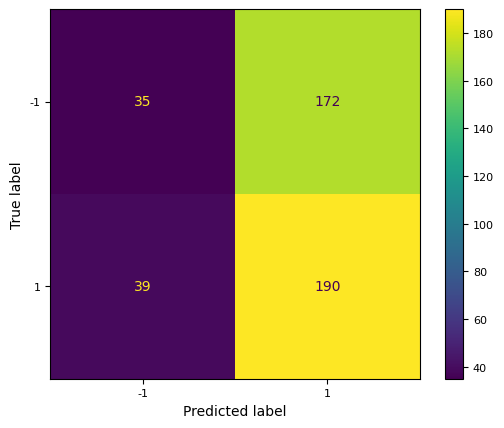

              precision    recall  f1-score   support

          -1       0.47      0.17      0.25       207
           1       0.52      0.83      0.64       229

    accuracy                           0.52       436
   macro avg       0.50      0.50      0.45       436
weighted avg       0.50      0.52      0.46       436



In [383]:
#               precision    recall  f1-score   support
# 
#           -1       0.47      0.17      0.25       207
#            1       0.52      0.83      0.64       229
# 
#     accuracy                           0.52       436
#    macro avg       0.50      0.50      0.45       436
# weighted avg       0.50      0.52      0.46       436
# 
# Tuned parameters yield no increase in accuracy, use default params
svm_clf = svm(random_state=42)
apply_SVM(svm_clf, X_train_one, y_train_one, X_test_one, y_test_one)

SVC(C=99.72520883810215, gamma=0.000379475861894686, random_state=42)

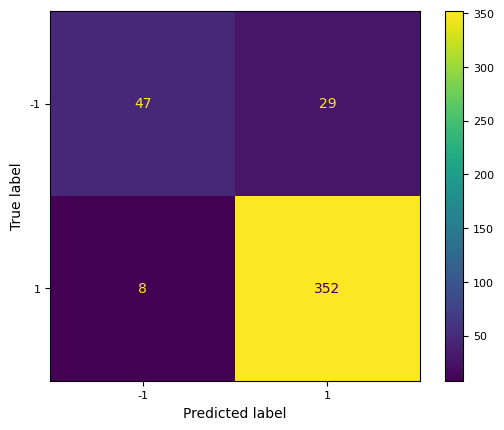

              precision    recall  f1-score   support

          -1       0.85      0.62      0.72        76
           1       0.92      0.98      0.95       360

    accuracy                           0.92       436
   macro avg       0.89      0.80      0.83       436
weighted avg       0.91      0.92      0.91       436



In [384]:
#               precision    recall  f1-score   support
# 
#           -1       0.65      0.37      0.47        76
#            1       0.88      0.96      0.92       360
# 
#     accuracy                           0.86       436
#    macro avg       0.76      0.66      0.69       436
# weighted avg       0.84      0.86      0.84       436
# 
# Tuned parameters yield about 6.9% increase in accuracy
svm_clf = svm(C=99.72520883810215, kernel='rbf', gamma=0.000379475861894686, random_state=42)
apply_SVM(svm_clf, X_train_two, y_train_two, X_test_two, y_test_two)

## XGBoost
"An optimized distributed gradient boosting library designed to be highly efficient, flexible and portable."
- Parameters being tuned:
    - 'eta'
    - 'n_estimators'
    - 'max_depth' 
    - 'gamma'
    - 'subsample'
    - 'min_child_weight'

In [385]:
def apply_XGB(xgb_clf: xgb, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Apply eXtreme Gradient Boosting (XGBoost or XGB) classifier, generate predictions, and evaluate the model.
    """
    if isinstance(xgb_clf, xgb):
        y_train_xgb = np.where(y_train == -1, 0, y_train)
        y_test_xgb = np.where(y_test == -1, 0, y_test)
        fitted_xgb = xgb_clf.fit(X_train, y_train_xgb)
        display(fitted_xgb)
        predictions_xgb = fitted_xgb.predict(X_test)
        cm = confusion_matrix(y_test_xgb, predictions_xgb)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot()
        plt.show()
        print(classification_report(y_test_xgb, predictions_xgb))
    else:
        raise ValueError('xgb_clf must be an instance of XGBClassifier')

In [386]:
xgb_clf = xgb(random_state=42)
xgb_params = {
    'eta': (0.1, 1.0),
    'n_estimators': list(range(5, 301, 5)),  
    'max_depth': (1, 20), 
    'gamma': (0.1, 1.0),
    'subsample': (0.1, 1.0),
    'min_child_weight': (1, 20)
}
y_train_xgb = np.where(y_train_one == -1, 0, y_train_one)
print('Strategy One:')
hypertune_Model(xgb_clf, xgb_params, X_train_one, y_train_xgb)
y_train_xgb = np.where(y_train_two == -1, 0, y_train_two)
print('\nStrategy Two:')
hypertune_Model(xgb_clf, xgb_params, X_train_two, y_train_xgb)

Strategy One:
Best Param: OrderedDict([('eta', 0.4076112303531503), ('gamma', 0.18791980100903388), ('max_depth', 1), ('min_child_weight', 1), ('n_estimators', 120), ('subsample', 0.8254396401182723)])
Best Score: 0.5424365181306194

Strategy Two:
Best Param: OrderedDict([('eta', 0.15225695434966804), ('gamma', 0.24120056438052023), ('max_depth', 1), ('min_child_weight', 1), ('n_estimators', 100), ('subsample', 0.7065883227831513)])
Best Score: 0.8744310509501695


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4076112303531503,
              eval_metric=None, feature_types=None, gamma=0.18791980100903388,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, ...)

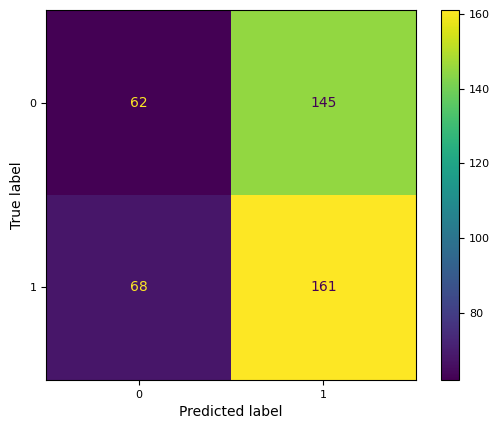

              precision    recall  f1-score   support

           0       0.48      0.30      0.37       207
           1       0.53      0.70      0.60       229

    accuracy                           0.51       436
   macro avg       0.50      0.50      0.48       436
weighted avg       0.50      0.51      0.49       436



In [387]:
# Before tuning
#               precision    recall  f1-score   support
# 
#            0       0.47      0.47      0.47       207
#            1       0.52      0.52      0.52       229
# 
#     accuracy                           0.50       436
#    macro avg       0.50      0.50      0.50       436
# weighted avg       0.50      0.50      0.50       436
# 
# Tuned parameters yield 2.0% increase in accuracy, use default params
xgb_clf = xgb(eta=0.4076112303531503, gamma=0.18791980100903388, max_depth=1, min_child_weight=1, n_estimators=120, subsample=0.8254396401182723, random_state=42)
apply_XGB(xgb_clf, X_train_one, y_train_one, X_test_one, y_test_one)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15225695434966804,
              eval_metric=None, feature_types=None, gamma=0.24120056438052023,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

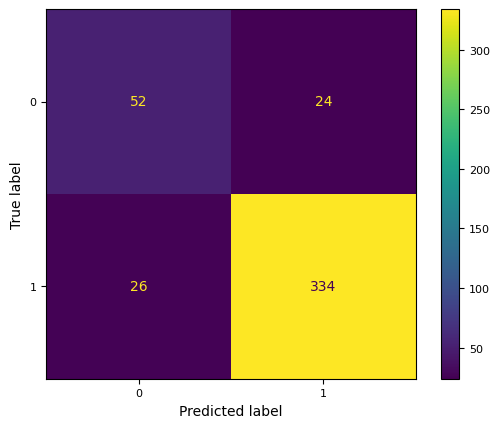

              precision    recall  f1-score   support

           0       0.67      0.68      0.68        76
           1       0.93      0.93      0.93       360

    accuracy                           0.89       436
   macro avg       0.80      0.81      0.80       436
weighted avg       0.89      0.89      0.89       436



In [388]:
# Before tuning
#               precision    recall  f1-score   support
# 
#            0       0.64      0.61      0.62        76
#            1       0.92      0.93      0.92       360
# 
#     accuracy                           0.87       436
#    macro avg       0.78      0.77      0.77       436
# weighted avg       0.87      0.87      0.87       436
# 
# Tuned parameters yield 2.3% increase in accuracy
xgb_clf = xgb(eta= 0.15225695434966804, gamma=0.24120056438052023, max_depth=1, min_child_weight=1, n_estimators=100, subsample=0.7065883227831513, random_state=42)
apply_XGB(xgb_clf, X_train_two, y_train_two, X_test_two, y_test_two)